In [1]:
import DataPreparationHelperFunctions as dphf
import utilities as ut
from DataPlotter import DataPlotter
from DataPreProcessing import DataPreProcessing
import config as cfg
import pandas as pd
import models as mdl

import matplotlib.pyplot as plt
%matplotlib inline


2024-09-08 17:59:56.515516: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-08 17:59:56.558026: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [2]:
# STEP 1 - get the data in the processable format
# Extract meta information about the actual data
test_info_df, train_validation_info_df = dphf.get_test_and_train_meta_data()
# Extract data and labels for train and test sets.
X,y,test_x,test_y = dphf.get_X_y_and_test_data_from_meta_data(test_info_df, train_validation_info_df) # do not change the input order
#print(X)
combined_df = pd.concat(X, ignore_index = True)

MultiIndex([(                   'ID',  'Unnamed: 0_level_1'),
            ('Position außen [µOhm]',  'Unnamed: 1_level_1'),
            (       'Position mitte',             ' [µOhm]'),
            (                'Power',                 '[W]'),
            (                'Focus',                '[mm]'),
            (                  'Gap',                '[µm]'),
            (        'Tension force',                 '[N]'),
            (         'Versagensart',  'Unnamed: 7_level_1'),
            (                  'Typ',  'Unnamed: 8_level_1'),
            (          'Bemerkungen',  'Unnamed: 9_level_1'),
            (          'Bemerkungen', 'Unnamed: 10_level_1')],
           )
                  ID Position außen [µOhm] Position mitte Power Focus  Gap  \
  Unnamed: 0_level_1    Unnamed: 1_level_1         [µOhm]   [W]  [mm] [µm]   
0                  1                    37             14  4000  -1.5    0   
1                  2                    38             14  4000  -1.5 

In [3]:
# STEP 2 - Apply other pre-processing techniques e.g. normalise/standardise etc.
data_pre_processor = DataPreProcessing(combined_df)
dp_X = data_pre_processor.apply_min_max_scaler(combined_df)


OK found first at the index 0


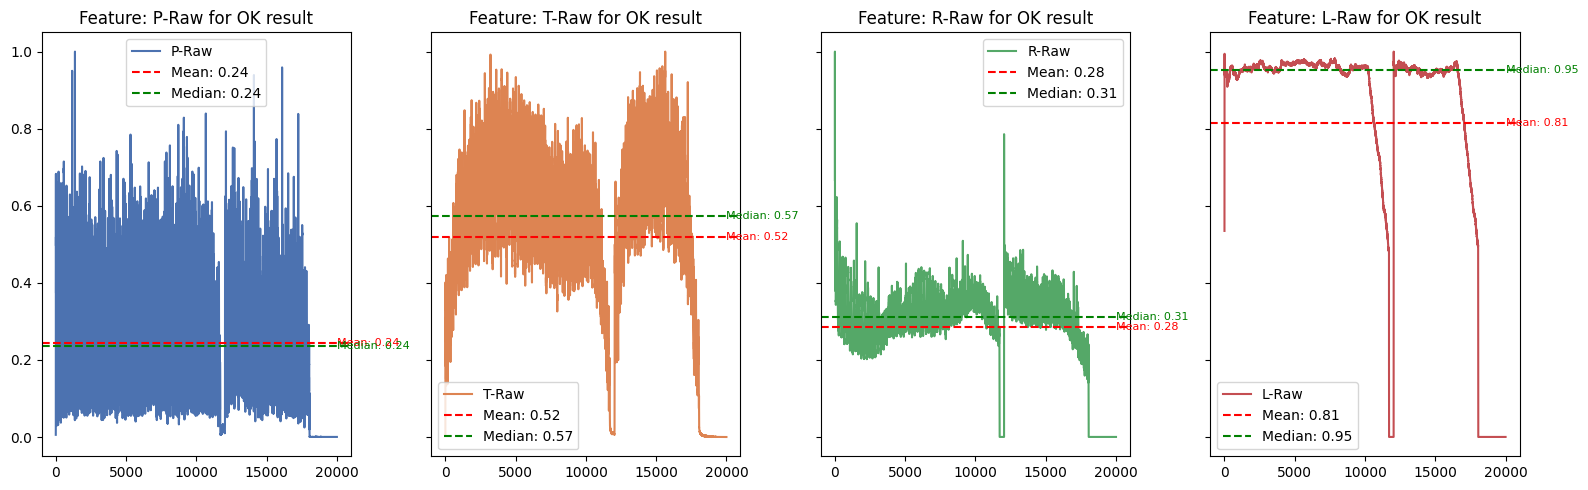

NOT OK found first at the index 24


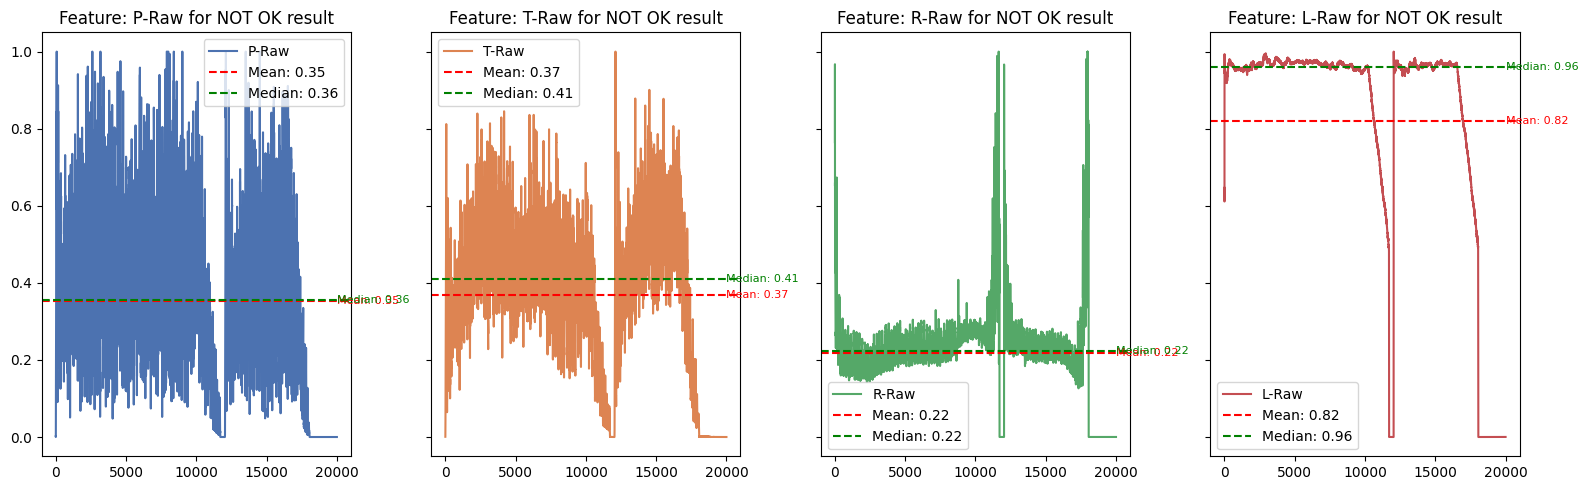

In [4]:
# STEP 3  - Visualise

# Plotting x data for two instances just for visual comparison, OK and NOT OK results
ut.plot_both_classes_input_data(X,y) # min-max scaler is done inside this function before plotting so not passing normalised data.

# histogram
#plotter = DataPlotter(combined_df)
#plotter.plot_data(graph_type = 'histogram', x_col = cfg.features,
                  #bins=15)
#data_plotter.plot_histogram_for_all_input_features(combined_df, cfg.features, 'Test', bins=15)




In [5]:
# STEP 4 - Split the data in train/test
X_train, X_val, y_train, y_val = dphf.train_test_data(X, y )
print(X_train, X_val, y_train, y_val)


[[[-1.19174225 -2.17321275  7.1764208  -0.66850946]
  [-1.18694972 -2.15965048  7.84006491 -0.62156082]
  [-1.11426302 -2.13167828  5.7595266  -0.26030336]
  ...
  [-1.20532109 -2.16388869 -2.3302112  -2.59538063]
  [-1.20771735 -2.16643162 -2.3302112  -2.59587483]
  [-1.19893105 -2.16388869 -2.3302112  -2.59587483]]

 [[-1.17097462 -2.16897454  0.25156043 -1.86545277]
  [-1.14781073 -2.15371698  4.27822812 -0.38335823]
  [-1.14142069 -2.14015471  2.4833088  -0.72880141]
  ...
  [-1.20851611 -2.17660332 -2.3302112  -2.59587483]
  [-1.20851611 -2.1740604  -2.3302112  -2.59587483]
  [-1.20851611 -2.17660332 -2.3302112  -2.59538063]]

 [[-1.17416964 -2.16388869  0.68558929 -1.32381369]
  [-1.15739579 -2.15456462  2.38670238 -0.39077117]
  [-1.10867173 -2.13167828  2.14588637 -0.58301351]
  ...
  [-1.20851611 -2.17236511 -2.3302112  -2.59538063]
  [-1.20851611 -2.17490804 -2.3302112  -2.59587483]
  [-1.20851611 -2.1681269  -2.3302112  -2.59587483]]

 ...

 [[-1.18055968 -2.16897454  5.2120

In [6]:
dpre_processor = DataPreProcessing(X)
norm_X = data_pre_processor.normalize_list_of_dfs(X) 

In [7]:
# Step 5 - Run a simple Keras model
o_sequential_K_fold_model,o_K_fold_histories = mdl.apply_k_fold_on_model(X,y) #original data

sequential_K_fold_model,K_fold_histories = mdl.apply_k_fold_on_model(norm_X,y) # min-max scaler normalised data


Training on fold 1...
Epoch 1/20
5/5 [==============================] - 13s 537ms/step - loss: 0.8843 - accuracy: 0.5630 - val_loss: 0.5507 - val_accuracy: 0.8824
Epoch 2/20
5/5 [==============================] - 2s 426ms/step - loss: 0.6642 - accuracy: 0.7014 - val_loss: 0.4517 - val_accuracy: 0.8824
Epoch 3/20
5/5 [==============================] - 2s 433ms/step - loss: 0.5235 - accuracy: 0.8013 - val_loss: 0.4281 - val_accuracy: 0.8824
Epoch 4/20
5/5 [==============================] - 2s 427ms/step - loss: 0.4495 - accuracy: 0.8612 - val_loss: 0.4363 - val_accuracy: 0.8824
Epoch 5/20
5/5 [==============================] - 2s 428ms/step - loss: 0.4183 - accuracy: 0.8927 - val_loss: 0.4541 - val_accuracy: 0.8824
Epoch 6/20
5/5 [==============================] - 2s 431ms/step - loss: 0.4099 - accuracy: 0.9088 - val_loss: 0.4675 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 2s 427ms/step - loss: 0.3942 - accuracy: 0.9159 - val_loss: 0.4507 - val_accuracy: 0.88

In [8]:
o_sequential_strapified_K_fold_model,o_strapified_K_fold_histories = mdl.apply_k_fold_on_model(X,y)
sequential_strapified_K_fold_model,strapified_K_fold_histories = mdl.apply_k_fold_on_model(norm_X,y) # min-max scaler normalised data

Training on fold 1...
Epoch 1/20
5/5 [==============================] - 4s 503ms/step - loss: 0.5146 - accuracy: 0.7803 - val_loss: 0.3891 - val_accuracy: 0.8824
Epoch 2/20
5/5 [==============================] - 2s 425ms/step - loss: 0.4181 - accuracy: 0.8654 - val_loss: 0.4050 - val_accuracy: 0.8824
Epoch 3/20
5/5 [==============================] - 2s 426ms/step - loss: 0.3712 - accuracy: 0.9028 - val_loss: 0.4300 - val_accuracy: 0.8824
Epoch 4/20
5/5 [==============================] - 2s 430ms/step - loss: 0.3575 - accuracy: 0.9174 - val_loss: 0.4461 - val_accuracy: 0.8824
Epoch 5/20
5/5 [==============================] - 2s 424ms/step - loss: 0.3502 - accuracy: 0.9234 - val_loss: 0.4427 - val_accuracy: 0.8824
Epoch 6/20
5/5 [==============================] - 2s 427ms/step - loss: 0.3418 - accuracy: 0.9259 - val_loss: 0.4324 - val_accuracy: 0.8824
Epoch 7/20
5/5 [==============================] - 2s 430ms/step - loss: 0.3333 - accuracy: 0.9273 - val_loss: 0.4218 - val_accuracy: 0.882

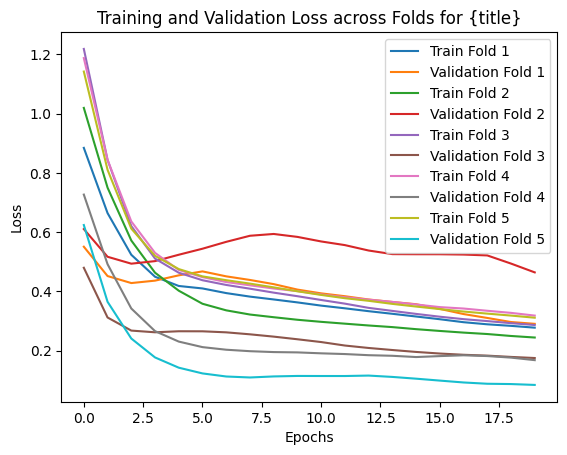

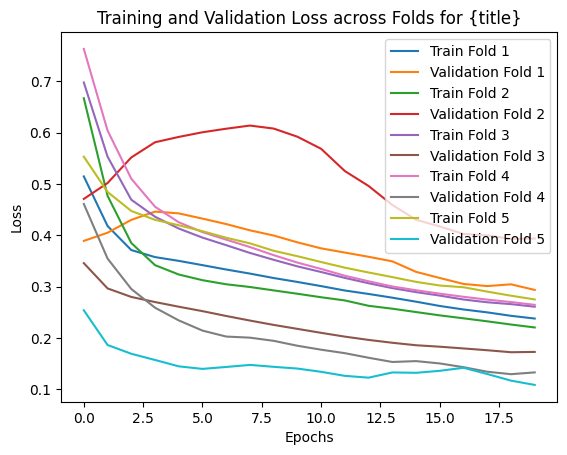

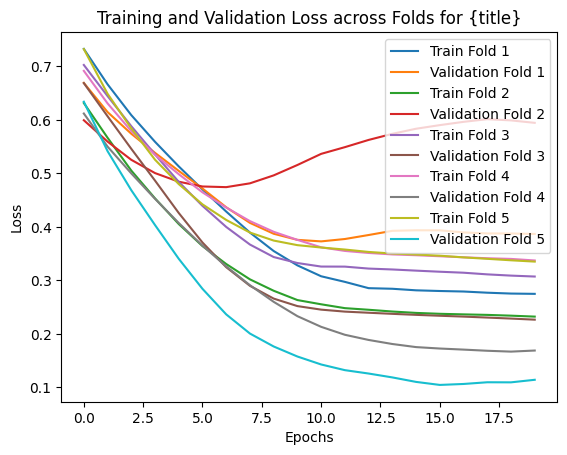

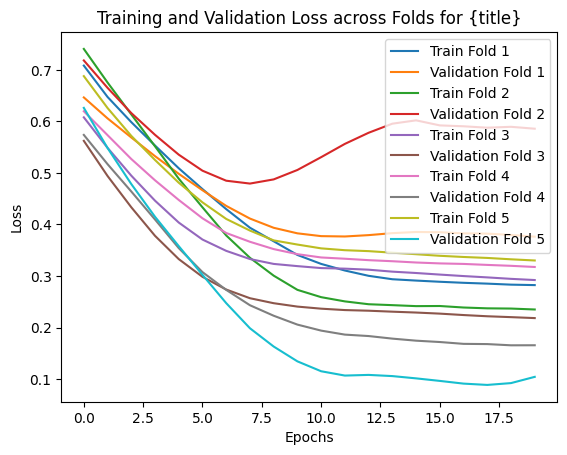

In [29]:
# STEP 6 - Visualise the results
ut.plot_histories(o_K_fold_histories,'Orig K_fold')
ut.plot_histories(o_strapified_K_fold_histories,'Orig Strapified_K_fold')
# STEP 6 - Visualise the results
ut.plot_histories(K_fold_histories,'norm K_fold')
ut.plot_histories(strapified_K_fold_histories,'Norm Strapified_K_fold')

In [23]:
# Step 7 - See the result and experiment with it.
# Convert list of DataFrames to NumPy array if needed
import numpy as np
test_x_array = np.array([df.values for df in test_x])
test_y_array = np.array(test_y)

print(f"Shape of test_x_array: {test_x_array.shape}")
print(f"Length of test_y_array: {len(test_y_array)}")


Shape of test_x_array: (28, 20001, 4)
Length of test_y_array: 28


In [25]:
o_k_fold_loss, o_k_fold_accuracy = o_sequential_K_fold_model.evaluate(test_x_array, test_y_array, verbose=1)
print('Data not normalised and used K-folds')
print(f"Test Loss: {o_k_fold_loss}")
print(f"Test Accuracy: {o_k_fold_accuracy}")

1/1 [==============================] - 1s 514ms/step - loss: 0.3172 - accuracy: 0.9216
Data not normalised and used K-folds
Test Loss: 0.31715038418769836
Test Accuracy: 0.9216111898422241


In [26]:
loss, accuracy = sequential_K_fold_model.evaluate(test_x_array, test_y_array, verbose=1)
print('Data normalised and used K-folds')
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 95ms/step - loss: 0.7143 - accuracy: 0.9286
Data normalised and used K-folds
Test Loss: 0.7142801880836487
Test Accuracy: 0.9285721182823181


In [27]:
o_strapified_loss, o_strapified_accuracy = o_sequential_strapified_K_fold_model.evaluate(test_x_array, test_y_array, verbose=1)
print('Data not normalised and used K-folds')
print(f"Test Loss: {o_strapified_loss}")
print(f"Test Accuracy: {o_strapified_accuracy}")

1/1 [==============================] - 1s 519ms/step - loss: 0.3314 - accuracy: 0.9016
Data not normalised and used K-folds
Test Loss: 0.33143001794815063
Test Accuracy: 0.9016193151473999


In [28]:
strapified_loss, strapified_accuracy = sequential_strapified_K_fold_model.evaluate(test_x_array, test_y_array, verbose=1)
print('Data normalised and used strapified K-folds')
print(f"Test Loss: {strapified_loss}")
print(f"Test Accuracy: {strapified_accuracy}")

1/1 [==============================] - 1s 536ms/step - loss: 0.6643 - accuracy: 0.9286
Data normalised and used strapified K-folds
Test Loss: 0.6642612218856812
Test Accuracy: 0.9285721182823181


1/1 [==============================] - 0s 309ms/step
Shape of the y_pred  (28, 20001, 1)
Shape of the y_pred  (28,)
test_y_array shape: (28,)
test_y_array type: <class 'numpy.ndarray'>
y_pred type: <class 'numpy.ndarray'>


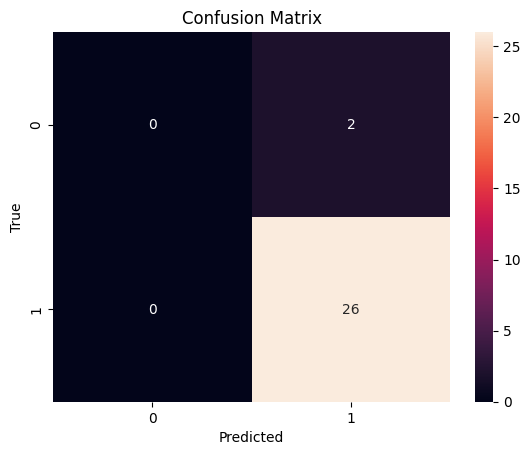

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.96        26

    accuracy                           0.93        28
   macro avg       0.46      0.50      0.48        28
weighted avg       0.86      0.93      0.89        28



In [12]:
# Step 8 - compare STEP 5 and STEP 7 results.

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import utilities as ut

# Generate predictions
y_pred = sequential_K_fold_model.predict(test_x_array)
print("Shape of the y_pred ",y_pred.shape)
y_pred = np.squeeze(y_pred)  # Now y_pred should have the shape (28, 20001)

# Step 2: Aggregate predictions per DataFrame (mean or majority vote)
# Option 1: Mean Aggregation
y_pred_mean = np.mean(y_pred, axis=1)  # Shape: (28,)

# Convert to binary labels
y_pred_binary = (y_pred_mean > 0.5).astype(int)  # Shape: (28,)
print("Shape of the y_pred ",y_pred_binary.shape)


if isinstance(test_y_array, np.ndarray):
    test_y_array = test_y_array.flatten()


print(f"test_y_array shape: {test_y_array.shape}")
print(f"test_y_array type: {type(test_y_array)}")
print(f"y_pred type: {type(y_pred_binary)}")



# Confusion Matrix
plot_confusion_matrix(test_y_array, y_pred_binary)

# Classification Report
print(classification_report(test_y_array, y_pred_binary,zero_division=0))

In [13]:
# STEP 9 - Run keras lib based model - functional model



In [14]:
# STEP 10 - Visualise the results



In [15]:
# STEP 10 - Adjust the parameters and visualise the results



In [16]:
# STEP 11 - Compare results



In [17]:
# STEP 12 - Run keras subclassed model


In [18]:

# STEP 13 - Visualise the results



In [19]:
# STEP 14 - Adjust the parameters and visualise the results



In [20]:
# STEP 15 - Compare results



In [21]:
# STEP 16 - Compare all models and conclude



In [22]:
# End